In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string

# VEST OH 2018
---

## VEST Documentation

### Election Results

#### Sources
Election results from the Ohio Secretary of State (https://www.sos.state.oh.us/elections/election-results-and-data/). 
#### Processing Part 1
The following counties include adjustments to account for corporate annexations that are not specified below by precinct: Adams, Athens, Auglaize, Brown, Butler, Defiance, Franklin, Geauga, Guernsey, Licking, Lorain, Madison, Marion, Miami, Ottawa, Pickaway, Shelby, Stark, Tuscarawas, Warren, Wayne, Wyandot.

This includes the amended Miami County results from January 2019, which reflect 6282 early votes that had gone uncounted.
#### Processing Part 2 (unclear whether this is for election results, shapefiles, or both)
The following additional revisions were made to match the 2018 precinct boundaries:

- **Athens:** Adjust Athens 4-4/4-5, Nelsonville 1/2/3/4
- **Brown:** Adjust Perry Twp South/Villages
- **Butler:** Adjust Hamilton 22/24, Oxford 6/11, Trenton 5/7, West Chester 28/39
- **Champaign:** Adjust Union N/S
- **Clark:** Align New Carlisle, Springfield precincts with county maps
- **Clermont:** Reverse unincorporation of Amelia and Newtonsville
- **Coshocton:** Split Coshocton 3-B/C, 4-B/C
- **Crawford:** Move eastern Polk Twp from Galion 1B to western Polk Twp
- **Cuyahoga:** Adjust Olmsted Twp D/F/H
- **Delaware:** Merge Berlin B/F, Concord F/J, Delaware 3-F/H, Orange G/U, Powell K into G/I, Westerville A/I
- **Fairfield:** Realign precincts in Columbus City, Lancaster Ward 1, Ward 2, Ward 6; Merge Pickerington K/O, Pickerington N into F/L; Adjust Bloom A/B, Lancaster 4-B/C, Pickerington J/K, Violet B/C, I/J
- **Franklin:** Merge Dub 1-I into Dub 1-A/F, Cols 08-A/H, 08-B/G, 12-D/E, 30-A/E, 33-C/J, 45-K/O, 46-G/M, 52-C/H, 73-J/M, 75-E/I, 79-D/E, 82-F/N, 82-I/O, 83-C/J, 83-F/I, Grove City 1-E/G, 2-E/G, Jefferson E/J, Reyns 2-A/G, Worth 3-A/D
- **Fulton:** Split Amboy/Metamora, Fayette/Gorham, Lyons/Royalton, Swancreek West 1/2, Swanton 1/2, Swanton 3/4, York N/S
- **Greene:** Adjust Bath 277/Fairborn 226/Xenia 351
- **Hamilton:** Merge Blue Ash 4-A/B, Norwood 1-A/C, Cincinnati 6-E into 6-A/B, 11-D into 11-A/B/C; Adjust Blue Ash 1-B/2-A/3-B/4-A, Cincinnati 23-A/D, 23-I/P, 25-F/K, Cleves A/Whitewater A, Colerain BB/F/H, Delhi A/B, Loveland D/Symmes C/K, Miami B/D/G, Whitewater A/C; Realign Cincinnati/Green B
- **Knox:** Merge Brinkhaven/Union
- **Lake:** Merge Concord B/O; Adjust Painesville A/K, Willoughby Hills CC/DD
- **Lorain:** Merge N. Ridgeville 3-F/H, N. Ridgeville 1-E into 1-B/D
- **Medina:** Merge Brunswick City 1-F into 1-C/D, Montville Twp H into A/B, Montville Twp I into A/C/E, York Twp C into A/B; Adjust Brunswick City 1-A/B, Wadsworth City 1-D/Sharon D, Wadsworth City 2-D/Twp C
- **Pickaway:** Merge Commercial Point East/West; Add Circleville 1-D; Align Circleville wards with city map
- **Putnam:** Merge Glandorf/Ottawa Twp West
- **Richland:** Adjust Ontario 3/4
- **Stark:** Split Alliance 3-A/C, Canton 2-D/F, 2-E/G, 4-D/E, Massillon 4-A/B, 5-B/C, 7-B/D, 7-H/I, Lake 10/12, Paris A/B, Plain 7/13, Plain 22/23; Merge Lake B into Lake A/15, Lawrence 6 into Lawrence 1/3; Adjust Jackson 6/22, N. Canton 2-A/B, Perry 4/16, Plain 8/29/30
- **Summit:** Adjust Coventry D/G, Hudson 1-B/3-C, South Lebanon A/B, Springfield F/J
- **Union:** Merge Jerome 3/6, Marysville 1/2, Marysville 4 into 3/11, Marysville 15 into 4/9
- **Warren:** Split Springboro City 4-B/D, Deerfield W from Deerfield AA/X, Mason City U from Mason City N/T; Merge Clearcreek B/N, Hamilton A/U, D/T, Turtlecreek L into Turtlecreek A/F, Mason City Z into Mason City F/Deerfield E/Union A; Adjust Carlisle 2-A/3-A, South Lebanon A/B, Springboro 1-B/C, Turtlecreek F/K
- **Wood:** Replace Bloom, Milton, Montgomery, Perry, Portage precincts with 2019 VTDs
- **Wyandot:** Split Sycamore Twp/Village


### Shapefiles

#### Sources
Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program final release. Note that some VTDs were relabeled to match precinct names and/or precinct codes in the November 2018 general election returns.

# Election Result Processing

## Get VEST file and FIPS dictionary ready

### Load in VEST file

In [2]:
vest_oh_18 = gp.read_file("./raw-from-source/VEST/oh_2018/oh_2018.shp")

In [3]:
vest_oh_18.crs

{'init': 'epsg:4269'}

<AxesSubplot:>

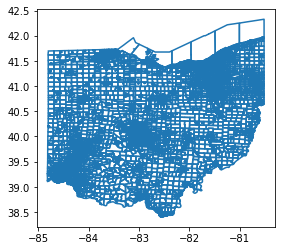

In [4]:
vest_oh_18.boundary.plot()

In [5]:
vest_oh_18.columns

Index(['STATEFP18', 'COUNTYFP18', 'VTDST18', 'PRECINCT18', 'GEOID18', 'NAME18',
       'G18USSRREN', 'G18USSDBRO', 'G18GOVRDEW', 'G18GOVDCOR', 'G18GOVLIRV',
       'G18GOVGGAD', 'G18ATGRYOS', 'G18ATGDDET', 'G18AUDRFAB', 'G18AUDDSPA',
       'G18AUDLCOO', 'G18SOSRLAR', 'G18SOSDCLY', 'G18SOSLNAN', 'G18TRERSPR',
       'G18TREDRIC', 'geometry'],
      dtype='object')

### Create a FIPs dictionary for OH

In [6]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Ohio"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
oh_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

## Load and Clean Election Results

### Load Election Results

Cleaned the `2018-11-06_statewideprecinct_miami.xlsx` file by hand, and created `2018-11-06_statewideprecinct_miami_clean.csv`. No modifications were made to the election results. The U.S. Senate results were pulled from the U.S. Congress tab and merged with the Statewide offices tab. Column names were renamed to match VEST's manually. 

In [7]:
#Load in clean SOS file
elections_2018 = pd.read_csv("./raw-from-source/SOS/2018-11-06_statewideprecinct_miami_clean.csv")

In [8]:
elections_2018.shape

(8904, 21)

In [9]:
elections_2018.head()

,County Name,Precinct Name,Precinct Code,Registered Voters,Total Voters,G18USSDBRO,G18USSRREN,G18GOVDCOR,G18GOVRDEW,G18GOVGGAD,...,G18ATGDDET,G18ATGRYOS,G18AUDLCOO,G18AUDRFAB,G18AUDDSPA,G18SOSDCLY,G18SOSRLAR,G18SOSLNAN,G18TREDRIC,G18TRERSPR
0,Adams,BRATTON TOWNSHIP,AAA,945,543,129,406,119,404,5,...,116,409,14,407,103,104,418,12,108,422
1,Adams,BRUSH CREEK TOWNSHIP,AAB,776,377,107,254,98,254,3,...,90,264,11,257,85,85,263,9,92,262
2,Adams,LOCUST GROVE,AAD,705,433,104,318,81,326,7,...,76,331,15,325,73,79,329,12,73,343
3,Adams,GREEN TOWNSHIP,AAE,416,177,69,98,60,108,1,...,54,107,4,103,58,57,105,2,57,109
4,Adams,JEFFERSON TOWNSHIP,AAG,530,255,82,165,69,166,3,...,65,174,2,172,64,66,173,3,69,170


In [10]:
#Map to the correct FIP
elections_2018["county"]=elections_2018["County Name"].map(oh_fips_dict).fillna(elections_2018["County Name"])

#Print out the FIPS to make sure they all are in the correct format
elections_2018["county"].unique()

array(['001', '003', '005', '007', '009', '011', '013', '015', '017',
       '019', '021', '023', '025', '027', '029', '031', '033', '035',
       '037', '039', '041', '043', '045', '047', '049', '051', '053',
       '055', '057', '059', '061', '063', '065', '067', '069', '071',
       '073', '075', '077', '079', '081', '083', '085', '087', '089',
       '091', '093', '095', '097', '099', '101', '103', '105', '107',
       '109', '111', '113', '115', '117', '119', '121', '123', '125',
       '127', '129', '131', '133', '135', '137', '139', '141', '143',
       '145', '147', '149', '151', '153', '155', '157', '159', '161',
       '163', '165', '167', '169', '171', '173', '175'], dtype=object)

## Compare Election Results Totals

### Compare Total Votes

In [11]:
races = [x for x in vest_oh_18.columns if 'G18' in x]
races

['G18USSRREN',
 'G18USSDBRO',
 'G18GOVRDEW',
 'G18GOVDCOR',
 'G18GOVLIRV',
 'G18GOVGGAD',
 'G18ATGRYOS',
 'G18ATGDDET',
 'G18AUDRFAB',
 'G18AUDDSPA',
 'G18AUDLCOO',
 'G18SOSRLAR',
 'G18SOSDCLY',
 'G18SOSLNAN',
 'G18TRERSPR',
 'G18TREDRIC']

In [12]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_oh_18[i])
    sum_var_2 += np.sum(elections_2018[i])
print(sum_var_1)
print(sum_var_2)

26258074
26258074


### Compare Race Totals

In [13]:
for race in races:
    diff_val = sum(vest_oh_18[race])-sum(elections_2018[race])
    if diff_val != 0:
        print(race+": "+str(diff_val))
    else:
        print(race+": EQUAL")

G18USSRREN: EQUAL
G18USSDBRO: EQUAL
G18GOVRDEW: EQUAL
G18GOVDCOR: EQUAL
G18GOVLIRV: EQUAL
G18GOVGGAD: EQUAL
G18ATGRYOS: EQUAL
G18ATGDDET: EQUAL
G18AUDRFAB: EQUAL
G18AUDDSPA: EQUAL
G18AUDLCOO: EQUAL
G18SOSRLAR: EQUAL
G18SOSDCLY: EQUAL
G18SOSLNAN: EQUAL
G18TRERSPR: EQUAL
G18TREDRIC: EQUAL


### Compare County Totals

In [15]:
diff_counties=[]
for i in races:
    diff = elections_2018.groupby(["county"]).sum()[i]-vest_oh_18.groupby(["COUNTYFP18"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False), 'NOT EQUAL')
    else:
        print(race + ' county totals: EQUAL')

G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL
G18TREDRIC county totals: EQUAL


# Precinct Shapefile

## Load in the shapefiles

### 2020 TIGER/Line

> Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program final release

Link to the 2020 TIGER/Line files for Ohio, where we can download the VTD file: 
https://www2.census.gov/geo/tiger/TIGER2020PL/STATE/39_OHIO/39/

In [16]:
tiger_vtd = gp.read_file('./raw-from-source/Census/tl_2020_39_vtd20/tl_2020_39_vtd20.shp')

In [17]:
tiger_vtd.head(1)

,STATEFP20,COUNTYFP20,VTDST20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,39,009,005ACR,39009005ACR,A,ATHENS 2-5,ATHENS 2-5,00,G5240,N,128384,1292,+39.3235059,-082.0932670,"POLYGON ((-82.09632 39.32211, -82.09627 39.322..."


In [18]:
tiger_vtd.shape

(8941, 15)

<AxesSubplot:>

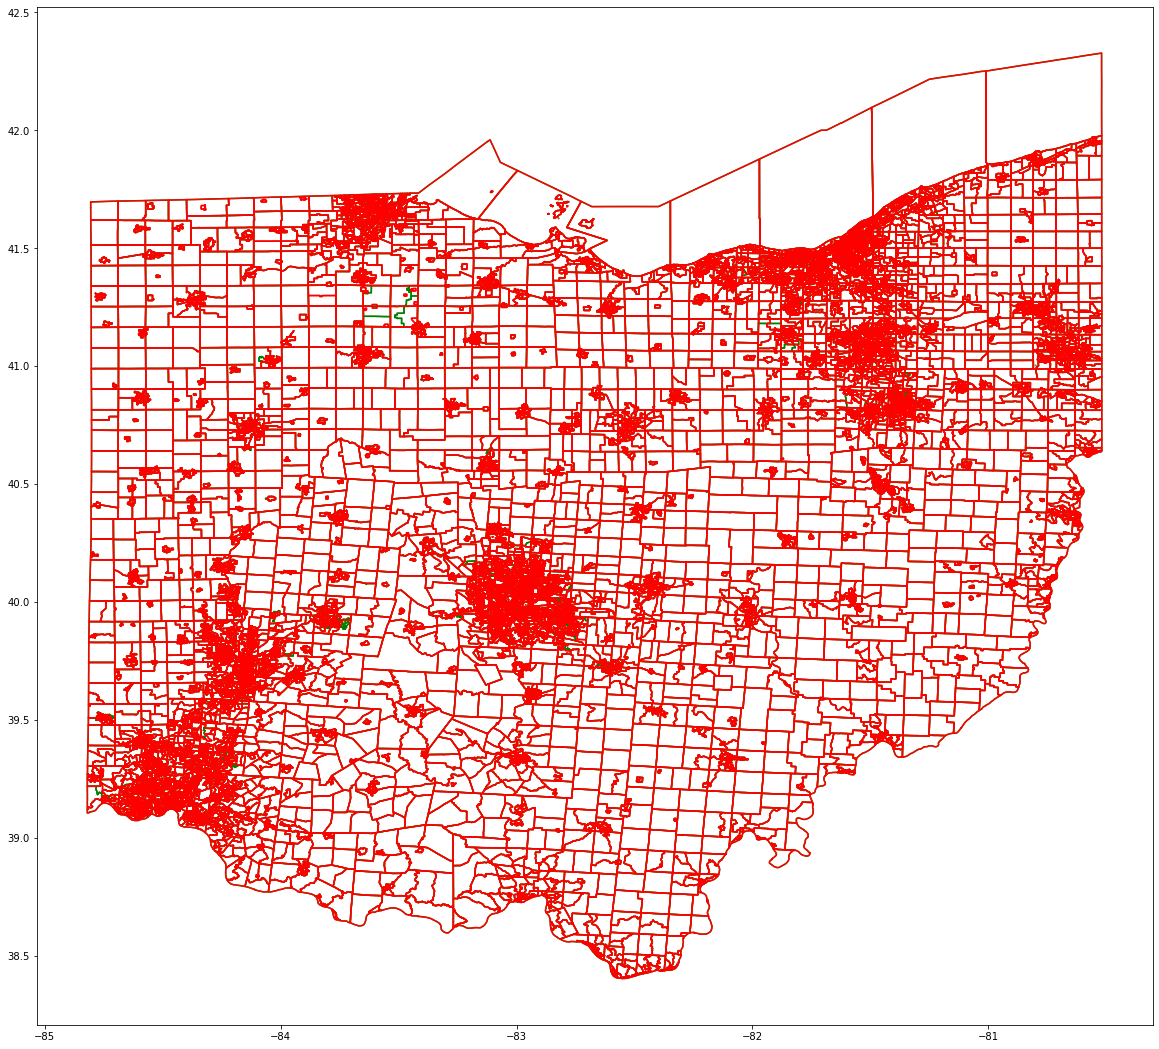

In [19]:
#Plot what they look like on top of one another, looks similar to what VEST has
ax = tiger_vtd.boundary.plot(figsize=(20,20),color="green")
vest_oh_18.boundary.plot(figsize=(20,20),ax=ax,color="red")

With a cursory look, this looks correct. 

In [20]:
merge_shps = pd.merge(tiger_vtd,vest_oh_18,how="outer",left_on="VTDST20",right_on="VTDST18",indicator=True)

In [21]:
both = merge_shps[merge_shps["_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_oh_18.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_oh_18.crs)
source_geoms = source_geoms.to_crs(epsg=3857)
vest_geoms = vest_geoms.to_crs(epsg=3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     8389
False     547
dtype: int64


### Redistricting Phase 2 Release

Downloaded files from this link: 
https://www.census.gov/geo/partnerships/pvs/partnership20v2/st39_oh.html
to compare to the 2020 TIGER/Line shapefile, but there are no VTD files in the partnersip 2020 v2 for Ohio. 

That only leaves the 2020 TIGER/Line as the 'final release' that VEST is referring to, however not clear why 547 precincts are off. 